In [258]:
pip install pyforest

In [259]:
import pyforest
import warnings
warnings.filterwarnings('ignore')

In [260]:
df = pd.read_csv('/content/Bank_churn_modelling.csv')
df

<IPython.core.display.Javascript object>

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [262]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RowNumber,10000,NaN,NaN,NaN,5000.5,2886.9,1,2500.75,5000.5,7500.25,10000
CustomerId,10000,NaN,NaN,NaN,1.56909e+07,71936.2,1.55657e+07,1.56285e+07,1.56907e+07,1.57532e+07,1.58157e+07
Surname,10000,2932,Smith,32,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CreditScore,10000,NaN,NaN,NaN,650.529,96.6533,350,584,652,718,850
Geography,10000,3,France,5014,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,10000,2,Male,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,10000,NaN,NaN,NaN,38.9218,10.4878,18,32,37,44,92
Tenure,10000,NaN,NaN,NaN,5.0128,2.89217,0,3,5,7,10
Balance,10000,NaN,NaN,NaN,76485.9,62397.4,0,0,97198.5,127644,250898
NumOfProducts,10000,NaN,NaN,NaN,1.5302,0.581654,1,1,1,2,4


In [263]:
df=df.drop(['RowNumber', 'CustomerId', 'Surname'],axis=1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

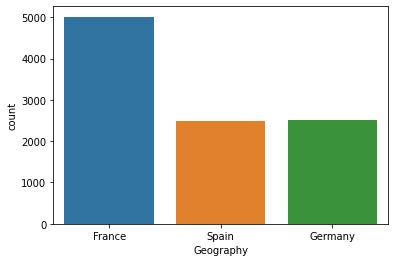

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

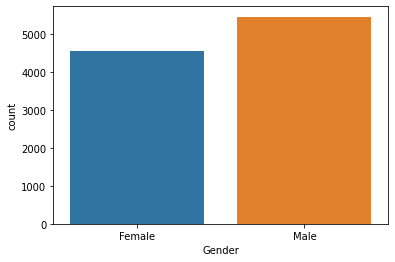

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

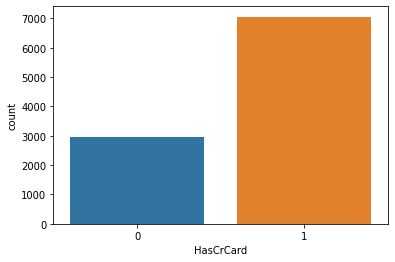

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

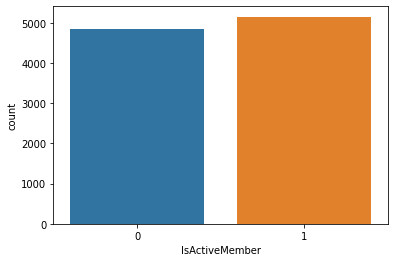

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

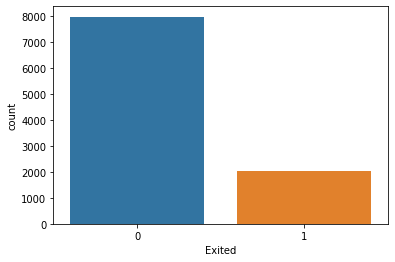

In [264]:
cat=["Geography","Gender","HasCrCard","IsActiveMember","Exited"]
con=['CreditScore',"Tenure","Balance",'NumOfProducts',"EstimatedSalary","Age"]
for i in cat:
    sns.countplot(x=i,data=df)
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

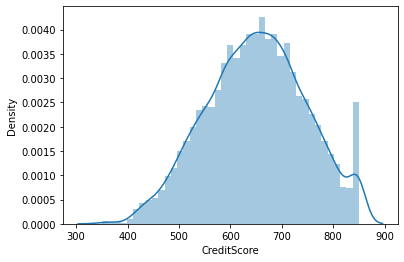

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

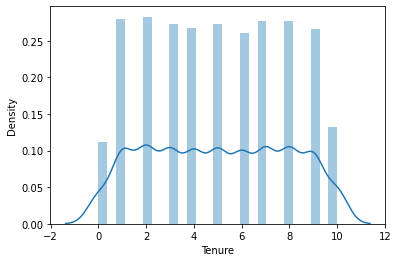

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

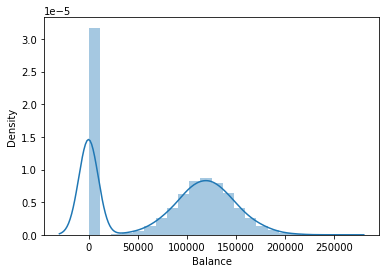

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

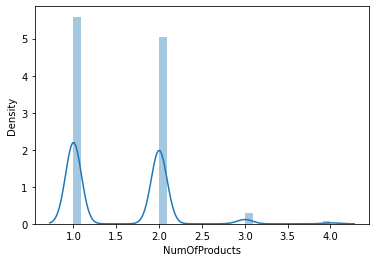

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

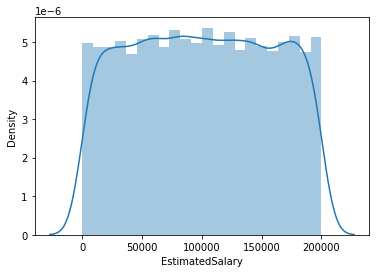

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

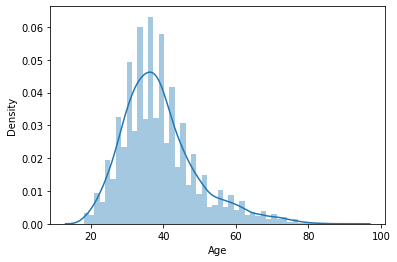

In [265]:
for i in con:
    sns.distplot(df[i])
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

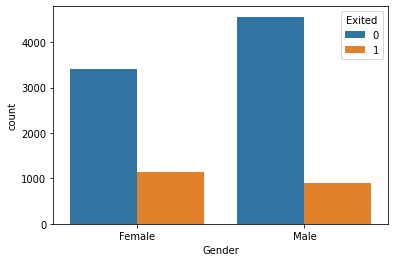

In [266]:
sns.countplot(x="Gender",hue="Exited",data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

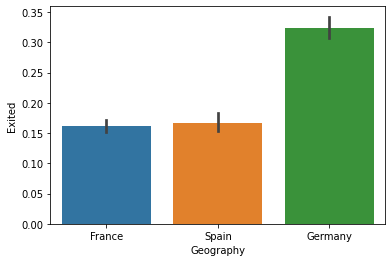

In [267]:
sns.barplot(x="Geography",y="Exited",data=df)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

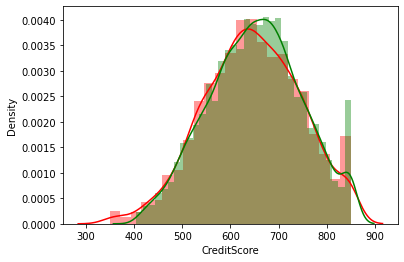

In [268]:
sns.distplot(df["CreditScore"][df["Exited"]==1],color='r')
sns.distplot(df["CreditScore"][df["Exited"]==0],color='g')
plt.show()

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [270]:
# logistic regression
x = df.iloc[:,0:10].values
y = df.iloc[:,10].values
print(x)
print(y)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]
[1 0 1 ... 1 1 0]


In [271]:
x.shape

(10000, 10)

In [272]:
y.shape

(10000,)

In [273]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
labelencoder = LabelEncoder()
x[:,1]=labelencoder.fit_transform(x[:,1])
labelencoder2 = LabelEncoder()
x[:,2]=labelencoder2.fit_transform(x[:,2])
onehotencoder = OneHotEncoder()
x = onehotencoder.fit_transform(x).toarray()
x = x[:,1:]

In [274]:
pip install sklearn

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,train_size=0.8,random_state=42)
X=X.reshape(-1,1)

<IPython.core.display.Javascript object>

In [276]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

In [277]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
model= LogisticRegression()
print(model.fit(X_train,y_train))
y_pred=model.predict(X_test)
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


<IPython.core.display.Javascript object>

Accuracy:  0.8035


<IPython.core.display.Javascript object>

In [282]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [281]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('accuracy score :' ,accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000

[[1607    0]
 [ 393    0]]
accuracy score : 0.8035


In [ ]:
'''from sklearn.svm import SVM as svm
svc_object = svc(kernel='rbf', degree=8)
svc_object.fit(x_train,y_train)
y_pred = svc_object.predict(y_test)'''

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier as rfc
rfc_object = rfc(n_estimators=200, random_state=0)
rfc_object.fit(x_train, y_train)
predicted_labels = rfc_object.predict(x_test,y_test)'''

In [ ]:
'''print(classification_report(test_labels, predicted_labels))
print(confusion_matrix(test_labels, predicted_labels))
print(accuracy_score(test_labels, predicted_labels))'''